# Visual exploitation of circadian genes



In [1]:
import pandas as pd

night_expression_tpm = pd.read_csv("/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm.tsv",
            sep="\t", index_col=0)
day_expression_tpm = pd.read_csv("/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm.tsv",
            sep="\t", index_col=0)

In [2]:
print(day_expression_tpm.shape)
print(night_expression_tpm.shape)

(39096, 176)
(39096, 228)


In [3]:
# Get the column names of both dataframes
columns_day = set(day_expression_tpm.columns)
columns_night = set(night_expression_tpm.columns)

# Find columns in day_expression_tpm but not in night_expression_tpm
columns_in_day_not_night = columns_day - columns_night
print("Columns in day_expression_tpm but not in night_expression_tpm:", columns_in_day_not_night)

# Find columns in night_expression_tpm but not in day_expression_tpm
columns_in_night_not_day = columns_night - columns_day
print("Columns in night_expression_tpm but not in day_expression_tpm:", columns_in_night_not_day)

Columns in day_expression_tpm but not in night_expression_tpm: {'14A0017_8', '14A0455_26'}
Columns in night_expression_tpm but not in day_expression_tpm: {'14A0503_8', '14A0381_8', '14A0173_8', '14A0179_8', '14A0151_8', '14A0195_8', '14A0185_8', '14A0129_8', '14A0139_8', '14A0121_8', '14A0181_8', '14A0263_8', '14A0207_8', '14A0203_8', '14A0409_26', '14A0147_8', '14A0127_8', '14A0109_8', '14A0435_8', '14A0135_8', '14A0311_8', '14A0161_8', '14A0125_8', '14A0235_8', '14A0219_8', '14A0143_8', '14A0145_8', '14A0131_8', '14A0141_8', '14A0201_8', '14A0159_8', '14A0289_8', '14A0163_8', '14A0149_8', '14A0187_8', '14A0249_8', '14A0183_8', '14A0217_8', '14A0281_8', '14A0107_8', '14A0241_8', '14A0189_8', '14A0205_8', '14A0199_8', '14A0115_8', '14A0119_8', '14A0165_8', '14A0153_8', '14A0117_8', '14A0239_8', '14A0191_8', '14A0213_8', '14A0175_8', '14A0133_8'}


In [4]:
tidy_day_expression = day_expression_tpm.reset_index().melt(id_vars='Name', var_name='Plot', value_name='TPM')
tidy_day_expression.rename(columns={'index': 'Name'}, inplace=True)
tidy_day_expression['Condition'] = 'Day'
tidy_night_expression = night_expression_tpm.reset_index().melt(id_vars='Name', var_name='Plot', value_name='TPM')
tidy_night_expression.rename(columns={'index': 'Name'}, inplace=True)
tidy_night_expression['Condition'] = 'Night'

In [5]:
tidy_combined_expression = pd.concat([tidy_day_expression, tidy_night_expression], ignore_index=True)

In [6]:
tidy_combined_expression.head()

,Name,Plot,TPM,Condition
0,Zm00001eb371370_T002,14A0253_26,1.178659,Day
1,Zm00001eb371350_T001,14A0253_26,0.000000,Day
2,Zm00001eb371330_T001,14A0253_26,0.000000,Day
3,Zm00001eb371310_T001,14A0253_26,0.000000,Day
4,Zm00001eb371280_T001,14A0253_26,1.494319,Day


In [7]:
# Filtering by genes of interest
filtered_genes_df = tidy_combined_expression[tidy_combined_expression['Name'].isin(['Zm00001eb159890_T001',
            'Zm00001eb397240_T001',
            'Zm00001eb072870_T003',
            'Zm00001eb428070_T001'])]

# Display the filtered dataframe
print(filtered_genes_df.shape)
print(filtered_genes_df.head())

(1616, 4)
                       Name        Plot        TPM Condition
12588  Zm00001eb159890_T001  14A0253_26  16.269183       Day
14793  Zm00001eb428070_T001  14A0253_26   0.261417       Day
29845  Zm00001eb397240_T001  14A0253_26  76.482497       Day
31150  Zm00001eb072870_T003  14A0253_26   0.653702       Day
51684  Zm00001eb159890_T001  14A0171_26  23.004846       Day


In [8]:
filtered_genes_df.shape

(1616, 4)

In [25]:
# Selecting genes that are present in two conditions for the same plot
gene_counts = filtered_genes_df[filtered_genes_df['Name'] == 'Zm00001eb159890_T001'].groupby('Plot').size()
selected_plots = gene_counts[gene_counts == 2].index.to_list()
filtered_genes_and_plots_df = filtered_genes_df[filtered_genes_df['Plot'].isin(selected_plots)]

In [26]:
len(selected_plots)

174

In [41]:
filtered_genes_and_plots_df.head()

,Name,Plot,TPM,Condition
0,Zm00001eb159890_T001,14A0253_26,16.269183,Day
1,Zm00001eb428070_T001,14A0253_26,0.261417,Day
2,Zm00001eb397240_T001,14A0253_26,76.482497,Day
3,Zm00001eb072870_T003,14A0253_26,0.653702,Day
4,Zm00001eb159890_T001,14A0171_26,23.004846,Day


In [53]:
# Initialize a list to store the differences
selected_gene = "Zm00001eb072870_T003"

gene_plot_df = pd.DataFrame()

# Loop through each plot in the selected plots
for plot in filtered_genes_and_plots_df['Plot'].unique():
    # Extract values for the selected gene in the current plot, for day and night conditions
    day_value = filtered_genes_and_plots_df[(filtered_genes_and_plots_df["Name"] == selected_gene) &
                                            (filtered_genes_and_plots_df["Condition"] == "Day") & 
                                            (filtered_genes_and_plots_df["Plot"] == plot)]["TPM"].values[0]
    night_value = filtered_genes_and_plots_df[(filtered_genes_and_plots_df["Name"] == selected_gene) &
                                              (filtered_genes_and_plots_df["Condition"] == "Night") & 
                                            (filtered_genes_and_plots_df["Plot"] == plot)]["TPM"].values[0]
    
    # Compute the difference and store it in the dictionary
    new_rows = pd.DataFrame({"Plot": plot, "Day": day_value, "Night": night_value, "Difference": day_value - night_value}, index=[0])
    gene_plot_df = pd.concat([gene_plot_df, new_rows], ignore_index=True)
    
print(gene_plot_df.head())

         Plot       Day       Night  Difference
0  14A0253_26  0.653702   54.389746  -53.736044
1  14A0171_26  1.878031  123.398482 -121.520451
2   14A0045_8  0.305705  134.748880 -134.443175
3   14A0085_8  0.595939  126.833606 -126.237667
4  14A0079_26  2.658494  106.733105 -104.074611


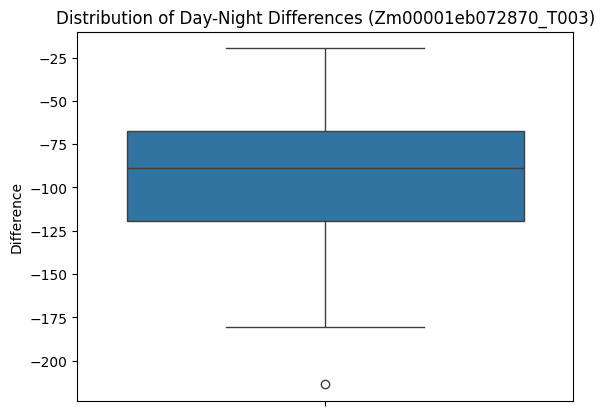

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(gene_plot_df["Difference"])
plt.title("Distribution of Day-Night Differences (Zm00001eb072870_T003)")
plt.show()

In [12]:
filtered_genes_and_plots_df[(filtered_genes_and_plots_df["Name"] == "Zm00001eb159890_T001") & 
                                          (filtered_genes_and_plots_df["Plot"] == "14A0253_26")]

,Name,Plot,TPM,Condition
12588,Zm00001eb159890_T001,14A0253_26,16.269183,Day
6893484,Zm00001eb159890_T001,14A0253_26,18.493508,Night


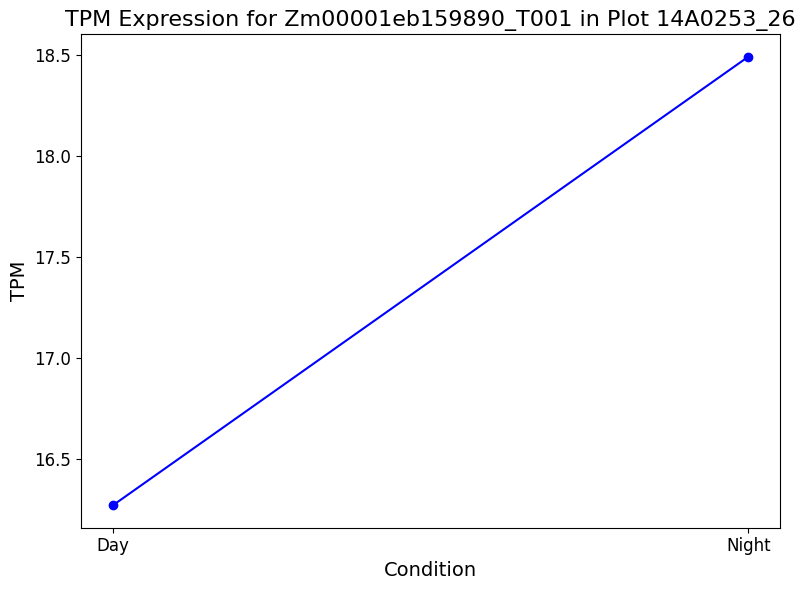

In [70]:
import matplotlib.pyplot as plt

# Define the gene and plot of interest
gene_of_interest = "Zm00001eb159890_T001"
plot_of_interest = "14A0253_26"

# Filter the dataframe for the gene and plot of interest
single_gene_filtered_df = filtered_genes_and_plots_df[(filtered_genes_and_plots_df["Name"] == gene_of_interest) & 
                                          (filtered_genes_and_plots_df["Plot"] == plot_of_interest)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(single_gene_filtered_df["Condition"], single_gene_filtered_df["TPM"], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title(f"TPM Expression for {gene_of_interest} in Plot {plot_of_interest}", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("TPM", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_2745211/4251992174.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x="Condition", y="TPM", palette="Set2")


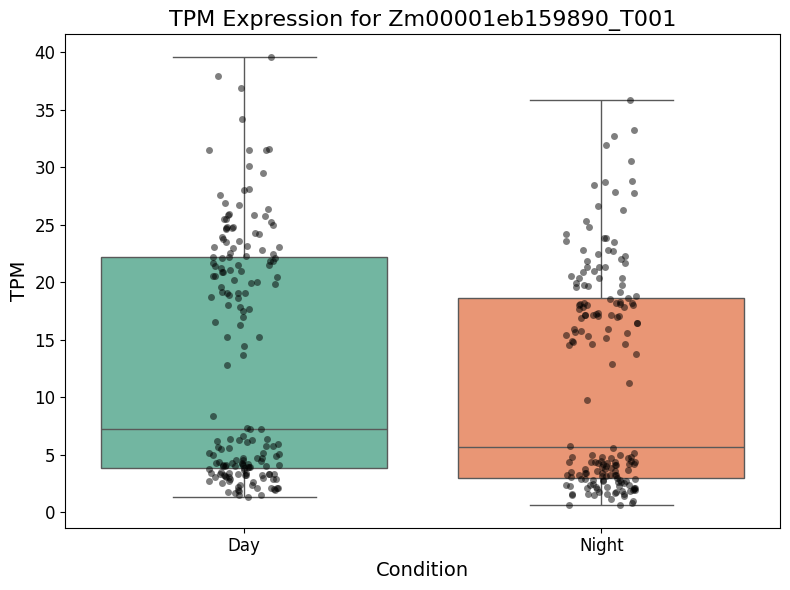

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the gene of interest
gene_of_interest = "Zm00001eb159890_T001"
filtered_df = filtered_genes_and_plots_df[filtered_genes_and_plots_df["Name"] == gene_of_interest]

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x="Condition", y="TPM", palette="Set2")

# Add points for individual TPM values
sns.stripplot(data=filtered_df, x="Condition", y="TPM", color="black", alpha=0.5, jitter=True)

# Customize plot
plt.title(f"TPM Expression for {gene_of_interest}", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("TPM", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

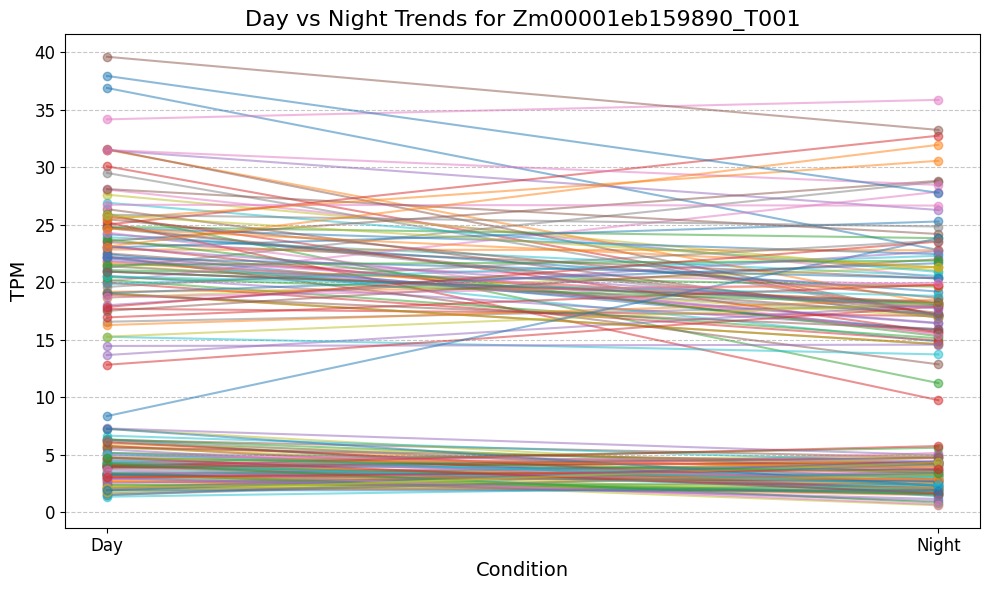

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the gene of interest
gene_of_interest = "Zm00001eb159890_T001"
filtered_df = filtered_genes_and_plots_df[filtered_genes_and_plots_df["Name"] == gene_of_interest]

# Plot the trends
plt.figure(figsize=(10, 6))

# Plot individual lines for each plot
for plot_id, group in filtered_df.groupby("Plot"):
    plt.plot(
        group["Condition"], 
        group["TPM"], 
        marker="o", 
        linestyle="-", 
        label=f"Plot {plot_id}" if plot_id in ['Plot1', 'Plot2'] else '',
        alpha=0.5
    )

# Enhance the plot
plt.title(f"Day vs Night Trends for {gene_of_interest}", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("TPM", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()